In [ ]:
# Data Preparation


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:

df = pd.read_excel("/content/heart_disease.xlsx")
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [ ]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [ ]:
df.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [ ]:
# EDA

In [ ]:
df.isnull().sum()

,0
age,0
Age in years,0


In [ ]:
df.dtypes

,0
age,object
Age in years,object


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')

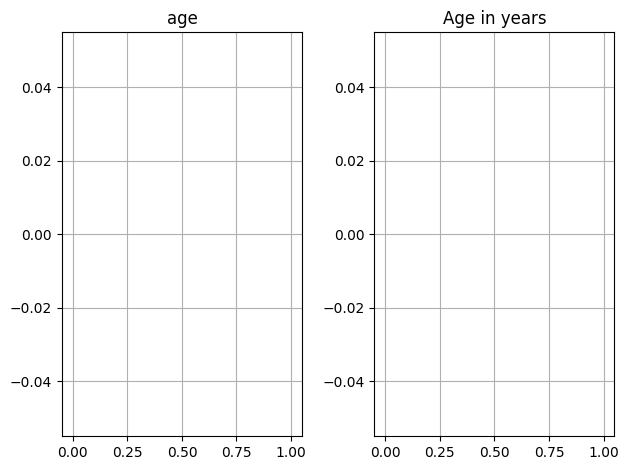

In [ ]:
df.hist()
plt.tight_layout()

<Axes: >

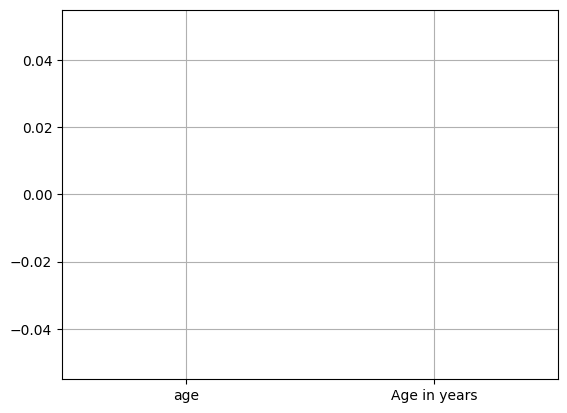

In [ ]:
df.boxplot()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


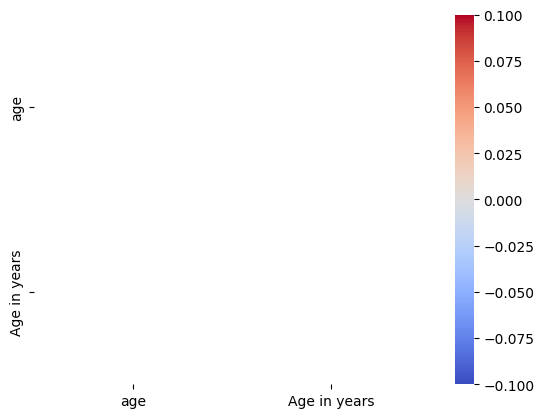

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
df['age'] = LabelEncoder().fit_transform(df['age'])

In [ ]:
scaler = StandardScaler()
numerical_features = ['age', 'Age in years']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
X = df.drop('age', axis=1)
y = df['age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth' : [ 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Model Accuracy: 1.0


In [ ]:
# Model Evaluation and analysis

In [ ]:
from sklearn.tree import plot_tree

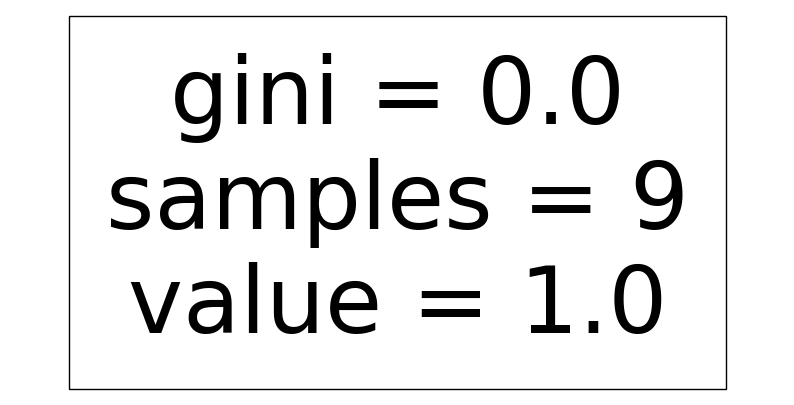

In [ ]:
plt.figure(figsize=(10,5))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: [0.]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


What are some common hyperparameters of decision tree models, and how  do they affect model performance?

 ->  

 Hyperparameters of decision tree models include:

 * max_depth: The maximum depth of the tree.
 * min_samples_split: The minimum number of samples required to split an internal node.
 * min_samples_leaf: The minimum number of samples required to be in a leaf node.
 * criterion: The function to measure the quality of a split.
 * max_features: The number of features to consider when looking for the best split.


Hyperparameter:

* max_depth:

  Too small → underfitting (model too simple)

  Too large (or None) → overfitting (model too complex, memorizes training data)


* min_samples_split:

   Small value → tree grows deep, may overfit.

   Large value → tree stops early, may underfit.


* min_samples_leaf:

  Small value  → high variance, overfits easily.

  Larger value → smooths predictions, reduces variance.


* max_features:

  Smaller value → more randomness → better generalization.

  Larger value → more accurate splits but risk of overfitting.


*  max_leaf_nodes:

  Reduces overfitting by limiting model complexity.

  Acts like a soft version of max_depth.

what are the difference between the label encoding and one hot encoding?

->

Label Encoding:
* Best for ordinal data (has a natural order)
* Creates a single integer-valued feature
* Harder to interpret, categories are replaced by integers
* Suitable for tree-based models that handle ordinal data.


One-hot encoding:
* Best for nominal data(no order) .
* Creates multiple binary features per category
* Easy to interpret, each column corresponds to a category
* Suitable for algorithms that don't assume ordinality